## How often does President Trump tweet each day?

In [46]:
import altair as alt
import pandas as pd
import matplotlib as mpl
import numpy as np
import json
import pytz
from datetime import datetime
import altair_latimes as lat
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

### Dump from trumptweetarchive.com

In [47]:
src = pd.read_json('/Users/mhustiles/data/github/notebooks/trump-tweet-frequency/output/realdonaldtrump.json') 

In [48]:
len(src)

41991

### Clean up dates

In [49]:
src['eastern_created_at'] = src['created_at'].dt.time
src['eastern_created_at'] = src['created_at'].dt.tz_localize("GMT").dt.tz_convert('America/Los_Angeles')
src['date'] = pd.to_datetime(src['eastern_created_at']).dt.strftime('%m/%d/%Y')
src['date'] = pd.to_datetime(src['date'])
src['year'] = src['eastern_created_at'].dt.year
src['month'] = src['eastern_created_at'].dt.month
src['day'] = src['eastern_created_at'].dt.day
src['hour'] = src['eastern_created_at'].dt.hour
src['minute'] = src['eastern_created_at'].dt.minute
src['time'] = src['eastern_created_at'].dt.time
src['id_str'] = src['id_str'].astype(str)
src['year'] = src['year'].astype(str)
src['month'] = src['month'].astype(str)
src['day'] = src['day'].astype(str)
src['hour'] = src['hour'].astype(str)

In [50]:
src.dtypes

index                                                    int64
created_at                                      datetime64[ns]
favorite_count                                           int64
id_str                                                  object
in_reply_to_user_id_str                                float64
is_retweet                                                bool
retweet_count                                            int64
source                                                  object
text                                                    object
eastern_created_at         datetime64[ns, America/Los_Angeles]
date                                            datetime64[ns]
year                                                    object
month                                                   object
day                                                     object
hour                                                    object
minute                                                 

In [51]:
src.head()

index          created_at  favorite_count               id_str  \
0         0 2019-10-26 14:43:01           53533  1188103745525243904   
1         1 2019-10-26 14:41:18           48198  1188103311653769216   
10       10 2019-10-26 11:21:15           77263  1188052969813614592   
100     100 2019-10-23 16:35:23           60137  1187044861725286400   
1000   1000 2019-09-27 11:42:00               0  1177548941644238848   

      in_reply_to_user_id_str  is_retweet  retweet_count              source  \
0                         NaN       False          13580  Twitter for iPhone   
1                         NaN       False          13414  Twitter for iPhone   
10                        NaN       False          16179  Twitter for iPhone   
100                       NaN       False          14810  Twitter for iPhone   
1000               25073877.0       False           3922  Twitter for iPhone   

                                                   text  \
0                            Where‚Äôs the Whistleblower?   
1     The Fake Washington Post keeps doing phony sto...   
10    Had a beautiful dinner last night at Camp Davi...   
100   Thank you General Mazloum for your kind words ...   
1000  ....sound horrible, an me sound guilty. HE WAS...   

            eastern_created_at       date  year month day hour  minute  \
0    2019-10-26 07:43:01-07:00 2019-10-26  2019    10  26    7      43   
1    2019-10-26 07:41:18-07:00 2019-10-26  2019    10  26    7      41   
10   2019-10-26 04:21:15-07:00 2019-10-26  2019    10  26    4      21   
100  2019-10-23 09:35:23-07:00 2019-10-23  2019    10  23    9      35   
1000 2019-09-27 04:42:00-07:00 2019-09-27  2019     9  27    4      42   

          time  
0     07:43:01  
1     07:41:18  
10    04:21:15  
100   09:35:23  
1000  04:42:00

### Tweets per year

In [52]:
trump_years = src.groupby(['year', 'month']).agg({'date': 'count'}).reset_index()

In [53]:
trump_years

year month  date
0    2009    10     4
1    2009    11     3
2    2009    12     2
3    2009     5    21
4    2009     6    11
5    2009     7     5
6    2009     8     7
7    2009     9     3
8    2010     1     4
9    2010    10     9
10   2010    11    11
11   2010    12    10
12   2010     2     4
13   2010     3    10
14   2010     4    18
15   2010     5    17
16   2010     6    17
17   2010     7    13
18   2010     8    16
19   2010     9    13
20   2011     1     9
21   2011    10   106
22   2011    11   112
23   2011    12   184
24   2011     2    16
25   2011     3    36
26   2011     4     5
27   2011     5    13
28   2011     6    16
29   2011     7    73
..    ...   ...   ...
96   2017     2   153
97   2017     3   145
98   2017     4   152
99   2017     5   157
100  2017     6   210
101  2017     7   245
102  2017     8   267
103  2017     9   307
104  2018     1   150
105  2018    10   389
106  2018    11   340
107  2018    12   291
108  2018     2   175
109  2018     3   171
110  2018     4   257
111  2018     5   259
112  2018     6   386
113  2018     7   338
114  2018     8   383
115  2018     9   378
116  2019     1   369
117  2019    10   869
118  2019     2   250
119  2019     3   400
120  2019     4   431
121  2019     5   692
122  2019     6   492
123  2019     7   691
124  2019     8   686
125  2019     9   800

[126 rows x 3 columns]

### What did he average each day in retweets, likes and replies

In [54]:
trump_engagements_day = src.groupby(['date']).mean().round().reset_index()

In [55]:
trump_engagements_day.head()

date  index  favorite_count  in_reply_to_user_id_str  is_retweet  \
0 2009-05-04   54.0           102.0                      NaN         0.0   
1 2009-05-08   52.0            14.0                      NaN         0.0   
2 2009-05-12   50.0           982.0                      NaN         0.0   
3 2009-05-13   49.0            10.0                      NaN         0.0   
4 2009-05-14   48.0             6.0                      NaN         0.0   

   retweet_count  minute  
0          128.0    27.0  
1            6.0    39.0  
2          716.0    14.0  
3           11.0    38.0  
4            3.0    30.0

### Limit data to when Trump took office

In [60]:
trumpall_prez = src[src.date >= '01/20/2017']

In [61]:
trumpall_prez

index          created_at  favorite_count               id_str  \
0          0 2019-10-26 14:43:01           53533  1188103745525243904   
1          1 2019-10-26 14:41:18           48198  1188103311653769216   
10        10 2019-10-26 11:21:15           77263  1188052969813614592   
100      100 2019-10-23 16:35:23           60137  1187044861725286400   
1000    1000 2019-09-27 11:42:00               0  1177548941644238848   
10000    806 2017-09-27 19:07:02           58803   913117797231857664   
10001    807 2017-09-27 13:41:25           96049   913035855509491712   
10002    808 2017-09-27 13:36:24           66773   913034591879024640   
10003    809 2017-09-27 11:36:21           64338   913004378486984704   
10004    810 2017-09-27 11:32:13           54410   913003340451188736   
10005    811 2017-09-27 11:09:02           92200   912997506900021248   
10006    812 2017-09-27 10:56:53           62258   912994446219898880   
10007    813 2017-09-27 02:17:15           88267   912863676792786944   
10008    814 2017-09-27 02:03:58           12517   912860336100904960   
10009    815 2017-09-27 01:15:55          146298   912848241535971328   
1001    1001 2019-09-27 11:41:59           23130  1177548939207352320   
10010    816 2017-09-27 00:30:55           54780   912836917296877568   
10011    817 2017-09-26 23:46:12           34145   912825663694016512   
10012    818 2017-09-26 22:43:24           39563   912809860965613568   
10013    819 2017-09-26 22:32:25           46986   912807096885723136   
10014    820 2017-09-26 21:34:20           46722   912792478096302080   
10015    821 2017-09-26 20:43:27           43553   912779672257261568   
10016    822 2017-09-26 20:11:48               0   912771708544802816   
10017    823 2017-09-26 16:13:46           37898   912711807709667328   
10018    824 2017-09-26 13:31:15           27784   912670906828443648   
10019    825 2017-09-26 13:06:05           89132   912664574461120512   
1002    1002 2019-09-27 11:20:26           68272  1177543516236500992   
10020    826 2017-09-26 12:13:00           67522   912651215997202432   
10021    827 2017-09-26 11:14:41           50076   912636538156146688   
10022    828 2017-09-26 10:55:47           29142   912631781098221568   
...      ...                 ...             ...                  ...   
9972     778 2017-09-30 01:33:27               0   913939816236093440   
9973     779 2017-09-30 01:32:52               0   913939669800202240   
9974     780 2017-09-30 01:30:27               0   913939062276358144   
9975     781 2017-09-30 01:30:08               0   913938985449328640   
9976     782 2017-09-30 01:29:20               0   913938781434204160   
9977     783 2017-09-30 01:28:35               0   913938593370042368   
9978     784 2017-09-30 01:24:10               0   913937483515269120   
9979     785 2017-09-29 23:03:31            4459   913902084461916160   
998      998 2019-09-27 12:29:51           95687  1177560986666098688   
9980     786 2017-09-29 22:23:31           28982   913892019847778304   
9981     787 2017-09-29 22:10:07           53021   913888647631577088   
9982     788 2017-09-29 20:02:02           31256   913856413541138432   
9983     789 2017-09-29 17:45:07           50093   913821956625059840   
9984     790 2017-09-29 13:39:53           59517   913760243770896384   
9985     791 2017-09-29 13:30:27           72303   913757869627133952   
9986     792 2017-09-29 11:18:55           57452   913724766208610304   
9987     793 2017-09-29 11:14:57           67066   913723771336392704   
9988     794 2017-09-29 02:22:36           91189   913589799411490816   
9989     795 2017-09-29 01:07:04               0   913570791698173952   
999      999 2019-09-27 12:29:51          101143  1177560985441361920   
9990     796 2017-09-29 00:03:09           65044   913554705816711168   
9991     797 2017-09-28 23:49:35               0   913551290717831168   
9992     798 2017-09-28 23:47:51               0   91355085323944

### Limit data to month Trump announced candidacy

In [62]:
trumpall_running = src[src.date >= '06/01/2015']
trumpall_running

index          created_at  favorite_count               id_str  \
0          0 2019-10-26 14:43:01           53533  1188103745525243904   
1          1 2019-10-26 14:41:18           48198  1188103311653769216   
10        10 2019-10-26 11:21:15           77263  1188052969813614592   
100      100 2019-10-23 16:35:23           60137  1187044861725286400   
1000    1000 2019-09-27 11:42:00               0  1177548941644238848   
10000    806 2017-09-27 19:07:02           58803   913117797231857664   
10001    807 2017-09-27 13:41:25           96049   913035855509491712   
10002    808 2017-09-27 13:36:24           66773   913034591879024640   
10003    809 2017-09-27 11:36:21           64338   913004378486984704   
10004    810 2017-09-27 11:32:13           54410   913003340451188736   
10005    811 2017-09-27 11:09:02           92200   912997506900021248   
10006    812 2017-09-27 10:56:53           62258   912994446219898880   
10007    813 2017-09-27 02:17:15           88267   912863676792786944   
10008    814 2017-09-27 02:03:58           12517   912860336100904960   
10009    815 2017-09-27 01:15:55          146298   912848241535971328   
1001    1001 2019-09-27 11:41:59           23130  1177548939207352320   
10010    816 2017-09-27 00:30:55           54780   912836917296877568   
10011    817 2017-09-26 23:46:12           34145   912825663694016512   
10012    818 2017-09-26 22:43:24           39563   912809860965613568   
10013    819 2017-09-26 22:32:25           46986   912807096885723136   
10014    820 2017-09-26 21:34:20           46722   912792478096302080   
10015    821 2017-09-26 20:43:27           43553   912779672257261568   
10016    822 2017-09-26 20:11:48               0   912771708544802816   
10017    823 2017-09-26 16:13:46           37898   912711807709667328   
10018    824 2017-09-26 13:31:15           27784   912670906828443648   
10019    825 2017-09-26 13:06:05           89132   912664574461120512   
1002    1002 2019-09-27 11:20:26           68272  1177543516236500992   
10020    826 2017-09-26 12:13:00           67522   912651215997202432   
10021    827 2017-09-26 11:14:41           50076   912636538156146688   
10022    828 2017-09-26 10:55:47           29142   912631781098221568   
...      ...                 ...             ...                  ...   
9972     778 2017-09-30 01:33:27               0   913939816236093440   
9973     779 2017-09-30 01:32:52               0   913939669800202240   
9974     780 2017-09-30 01:30:27               0   913939062276358144   
9975     781 2017-09-30 01:30:08               0   913938985449328640   
9976     782 2017-09-30 01:29:20               0   913938781434204160   
9977     783 2017-09-30 01:28:35               0   913938593370042368   
9978     784 2017-09-30 01:24:10               0   913937483515269120   
9979     785 2017-09-29 23:03:31            4459   913902084461916160   
998      998 2019-09-27 12:29:51           95687  1177560986666098688   
9980     786 2017-09-29 22:23:31           28982   913892019847778304   
9981     787 2017-09-29 22:10:07           53021   913888647631577088   
9982     788 2017-09-29 20:02:02           31256   913856413541138432   
9983     789 2017-09-29 17:45:07           50093   913821956625059840   
9984     790 2017-09-29 13:39:53           59517   913760243770896384   
9985     791 2017-09-29 13:30:27           72303   913757869627133952   
9986     792 2017-09-29 11:18:55           57452   913724766208610304   
9987     793 2017-09-29 11:14:57           67066   913723771336392704   
9988     794 2017-09-29 02:22:36           91189   913589799411490816   
9989     795 2017-09-29 01:07:04               0   913570791698173952   
999      999 2019-09-27 12:29:51          101143  1177560985441361920   
9990     796 2017-09-29 00:03:09           65044   913554705816711168   
9991     797 2017-09-28 23:49:35               0   913551290717831168   
9992     798 2017-09-28 23:47:51               0   91355085323944

### Count daily tweets since candidacy, create dataframe with results

In [63]:
trump_tweets_day_candidacy = trumpall_running.groupby(['date']).size()
trump_tweets_day_candidacy_df = pd.DataFrame({'date': trump_tweets_day_candidacy.index, 'count': trump_tweets_day_candidacy.values})

### Count daily tweets since inaguration, create dataframe with results

In [64]:
trump_tweets_day_prez = trumpall_prez.groupby(['date']).size()
trump_tweets_day_prez_df = pd.DataFrame({'date': trump_tweets_day_prez.index, 'count': trump_tweets_day_prez.values})

### Sort table to see top days since candidacy

In [65]:
trump_freq_candidacy = trump_tweets_day_candidacy_df.sort_values(['count'], ascending=False)

In [66]:
trump_freq_candidacy.head(10)

date  count
132  2015-10-13     93
503  2016-10-19     87
1410 2019-05-01     84
1420 2019-05-11     71
137  2015-10-18     69
493  2016-10-09     68
110  2015-09-21     63
31   2015-07-02     60
1581 2019-10-19     60
1558 2019-09-26     60

### Sort table to see top days since inauguration

In [67]:
trump_freq_inauguration = trump_tweets_day_prez_df.sort_values(['count'], ascending=False)

In [68]:
trump_freq_inauguration.head(10)

date  count
817 2019-05-01     84
827 2019-05-11     71
965 2019-09-26     60
988 2019-10-19     60
939 2019-08-31     59
980 2019-10-11     59
976 2019-10-07     53
972 2019-10-03     51
873 2019-06-26     50
921 2019-08-13     49

### Read all from today

In [69]:
trump_tweets_today = trumpall_prez[trumpall_prez.date == '09/29/2019']
trump_tweets_today

index          created_at  favorite_count               id_str  \
895    895 2019-09-30 03:53:55               0  1178518307848278016   
896    896 2019-09-30 03:24:24               0  1178510879488389120   
897    897 2019-09-30 03:01:10           44751  1178505032892846080   
898    898 2019-09-30 02:41:16           70752  1178500028085743616   
899    899 2019-09-30 02:30:17           39581  1178497262550421504   
900    900 2019-09-30 01:11:55           75158  1178477539653771264   
901    901 2019-09-30 01:11:54           60222  1178477538177425408   
902    902 2019-09-30 01:11:54           31799  1178477536818413568   
903    903 2019-09-30 01:11:53           86182  1178477534347960320   
904    904 2019-09-30 00:30:58           85943  1178467237096775680   
905    905 2019-09-30 00:22:14           57286  1178465038643978240   
906    906 2019-09-30 00:22:14           89800  1178465036811034624   
907    907 2019-09-29 23:58:39               0  1178459101191380992   
908    908 2019-09-29 23:07:18           81062  1178446179320942592   
909    909 2019-09-29 22:53:44           99454  1178442765736333312   
910    910 2019-09-29 22:53:43           98983  1178442762284404736   
911    911 2019-09-29 22:53:42          130386  1178442759499370496   
912    912 2019-09-29 18:16:31               0  1178373003014488064   
913    913 2019-09-29 18:15:22           49638  1178372711439093760   
914    914 2019-09-29 18:12:38           49693  1178372025901109248   
915    915 2019-09-29 17:47:35           55948  1178365721249759232   
916    916 2019-09-29 15:18:44           63312  1178328262537285632   
917    917 2019-09-29 14:25:34               0  1178314883672215552   
918    918 2019-09-29 14:25:22               0  1178314832786968576   
919    919 2019-09-29 14:23:21               0  1178314324575735808   
920    920 2019-09-29 14:20:12           43162  1178313529700622336   
921    921 2019-09-29 14:16:43               0  1178312653732814848   
922    922 2019-09-29 14:16:38               0  1178312631691726848   
923    923 2019-09-29 14:16:10               0  1178312517774389248   
924    924 2019-09-29 14:16:07               0  1178312503887093760   
925    925 2019-09-29 14:15:15               0  1178312286127169536   
926    926 2019-09-29 14:14:41               0  1178312142703005696   
927    927 2019-09-29 14:13:21               0  1178311808945414144   
928    928 2019-09-29 14:13:17               0  1178311788565336064   
929    929 2019-09-29 14:13:02               0  1178311726883905536   
930    930 2019-09-29 14:12:37               0  1178311620994457600   
931    931 2019-09-29 14:11:31               0  1178311345944612864   
932    932 2019-09-29 14:11:14               0  1178311276084318208   
933    933 2019-09-29 14:11:11               0  1178311261949485056   
934    934 2019-09-29 14:10:49               0  1178311168324227072   
935    935 2019-09-29 14:10:31           38398  1178311095360073728   
936    936 2019-09-29 14:02:57               0  1178309191049650176   
937    937 2019-09-29 14:02:45               0  1178309140986376192   
938    938 2019-09-29 14:02:38               0  1178309108899991552   
939    939 2019-09-29 14:02:35               0  1178309095885017088   
940    940 2019-09-29 13:18:48           62220  1178298078031437824   
941    941 2019-09-29 12:29:36           70234  1178285698111168512   
942    942 2019-09-29 12:22:28           41160  1178283903490183168   

     in_reply_to_user_id_str  is_retweet  retweet_count                source  \
895                      NaN        True          25051    Twitter for iPhone   
896                      NaN        True          96967    Twitter for iPhone   
897                      NaN       False          13631  Twitter Media Studio   
898                      NaN       False          23142  Twitter Media Studio   
899                      NaN       False          11870  Twitter Media Studio   
900               25073877.0       Fals

### Chart it!

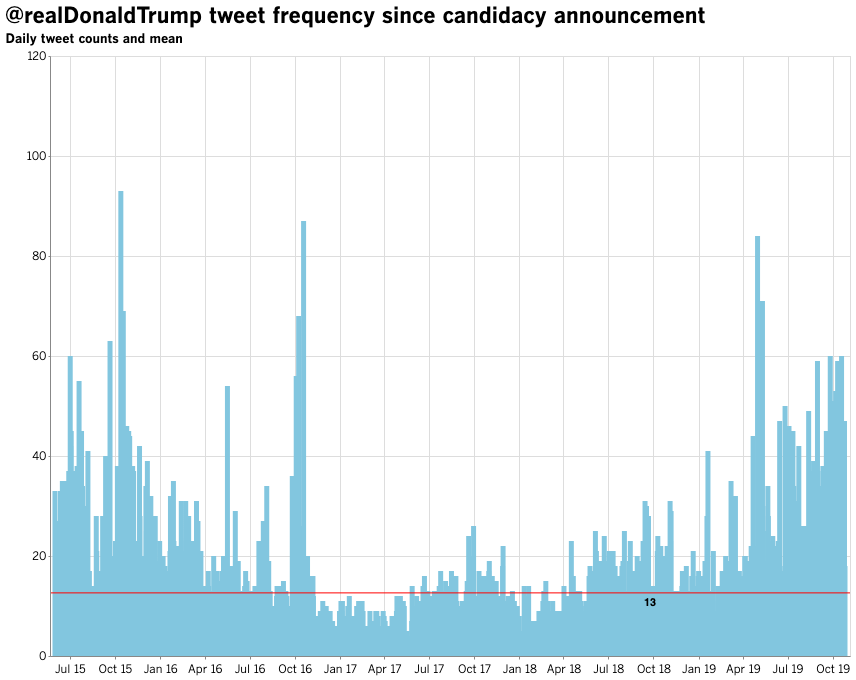

In [70]:
#bars

lines = alt.Chart(trump_tweets_day_candidacy_df, title = '@realDonaldTrump tweet frequency since candidacy announcement').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b %y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 120)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_tweets_day_candidacy_df).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( lines + rule + text ).properties(height=600,width=800)

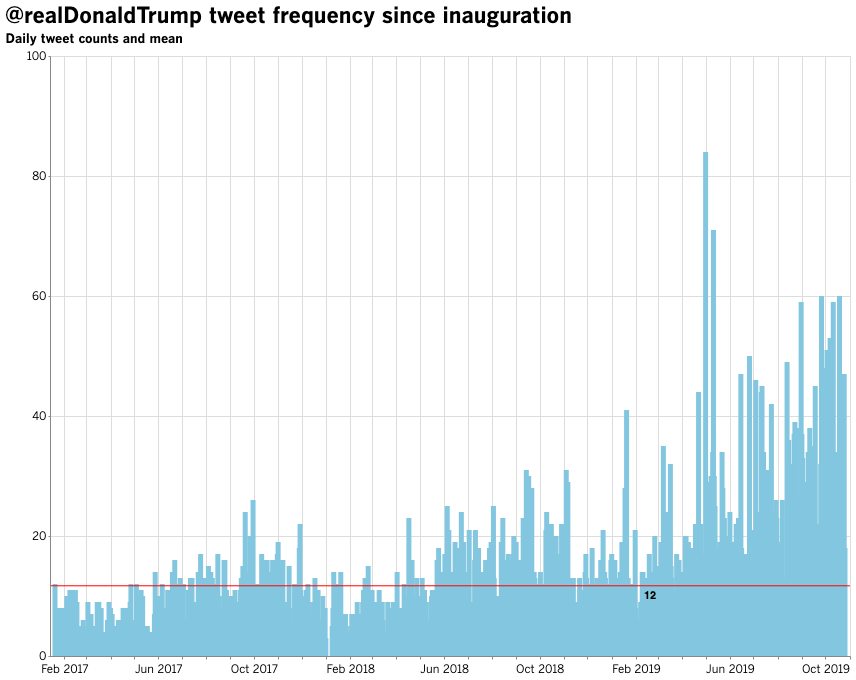

In [71]:
#bars

bars = alt.Chart(trump_freq_inauguration, title = '@realDonaldTrump tweet frequency since inauguration').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b 20%y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 100)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_freq_inauguration).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( bars + rule + text ).properties(height=600,width=800)

In [72]:
trump_freq_inauguration.head()

date  count
817 2019-05-01     84
827 2019-05-11     71
965 2019-09-26     60
988 2019-10-19     60
939 2019-08-31     59

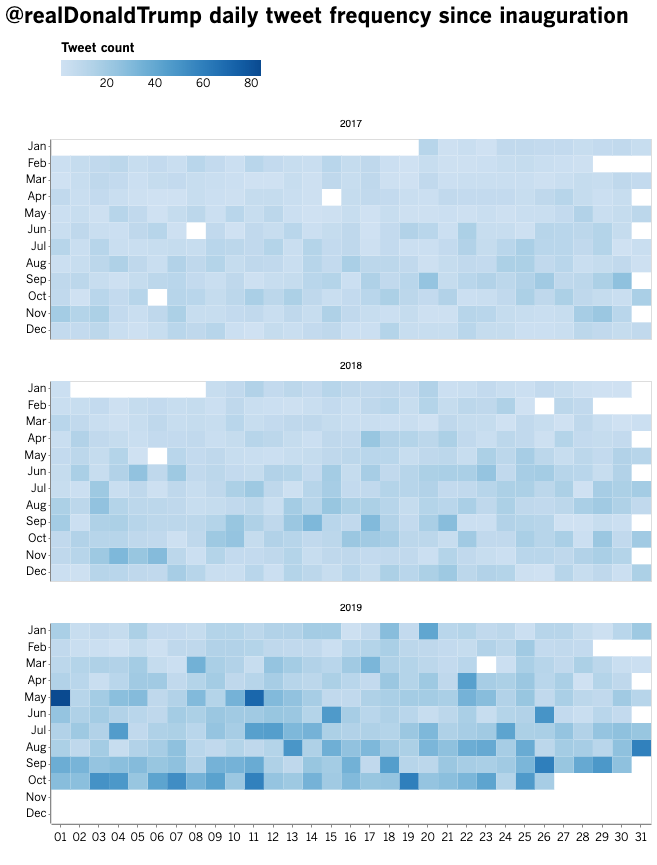

In [73]:
heatmap = alt.Chart(
    trump_freq_inauguration,
    title="@realDonaldTrump daily tweet frequency since inauguration"
).mark_rect().encode(
    x=alt.X('date(date):O', title=' '),
    y=alt.Y('month(date):O', title=''),
    color=alt.Color('count:Q', title='Tweet count', scale=alt.Scale(scheme="blues")),
    tooltip=[
        alt.Tooltip('monthdate(date):T', title='Date'),
        alt.Tooltip('count:Q', title='Tweets')
    ],
    facet=alt.Facet('year(date):O', title='')
).properties(width=600, height=200,columns=1)

heatmap.configure_legend(
    orient='top',
    padding=10
)

In [96]:
trump_RT_freq_inauguration = trump_tweets_day_prez_df.sort_values(['count'], ascending=False)

In [97]:
trumpall_prez_rt = trumpall_prez[trumpall_prez['is_retweet'] == True]
trumpall_prez_no_rt = trumpall_prez[trumpall_prez['is_retweet'] == False]

### Retweets

In [98]:
trump_tweets_day_prez_rt = trumpall_prez_rt.groupby(['date']).size()
trump_tweets_day_prez_rt_df = pd.DataFrame({'date': trump_tweets_day_prez_rt.index, \
                                         'count': trump_tweets_day_prez_rt.values})

### No retweets

In [99]:
trump_tweets_day_prez_no_rt = trumpall_prez_no_rt.groupby(['date']).size()
trump_tweets_day_prez_no_rt_df = pd.DataFrame({'date': trump_tweets_day_prez_no_rt.index, \
                                         'count': trump_tweets_day_prez_no_rt.values})

In [100]:
# retweets
trump_rt_freq_inauguration = trump_tweets_day_prez_rt_df.sort_values(['count'], ascending=False)
# no retweets
trump_no_rt_freq_inauguration = trump_tweets_day_prez_no_rt_df.sort_values(['count'], ascending=False)

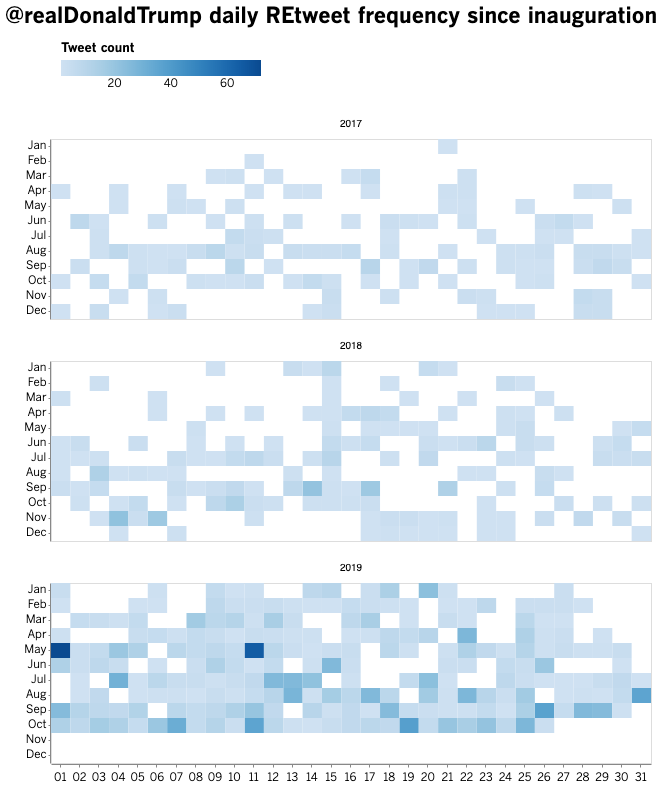

In [101]:
heatmap = alt.Chart(
    trump_rt_freq_inauguration,
    title="@realDonaldTrump daily REtweet frequency since inauguration"
).mark_rect().encode(
    x=alt.X('date(date):O', title=' '),
    y=alt.Y('month(date):O', title=''),
    color=alt.Color('count:Q', title='Tweet count', scale=alt.Scale(scheme="blues")),
    tooltip=[
        alt.Tooltip('monthdate(date):T', title='Date'),
        alt.Tooltip('count:Q', title='Tweets')
    ],
    facet=alt.Facet('year(date):O', title='')
).properties(width=600, height=180,columns=1)

heatmap.configure_legend(
    orient='top',
    padding=10
)

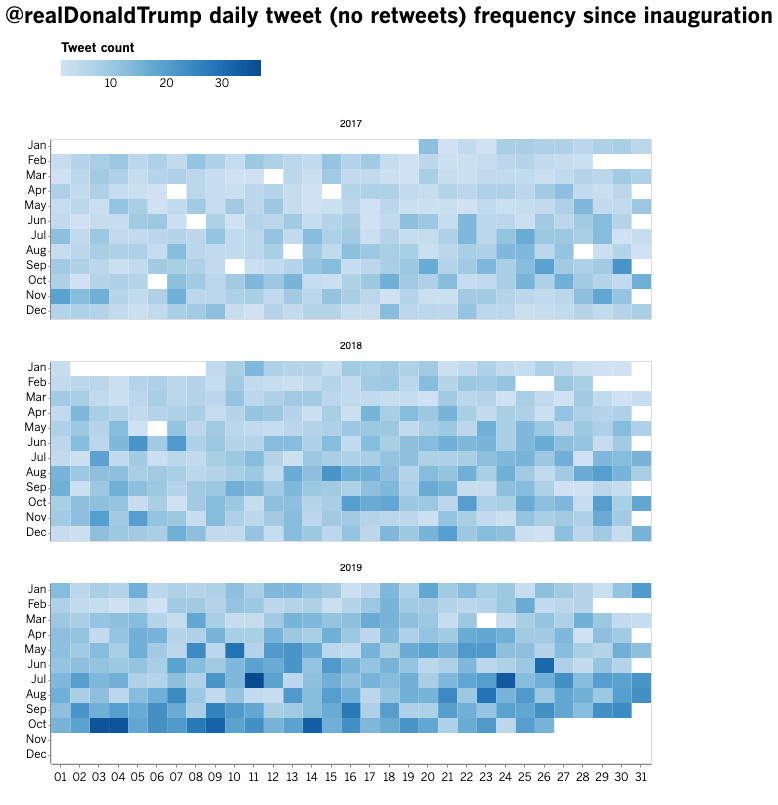

In [127]:
heatmap = alt.Chart(
    trump_no_rt_freq_inauguration,
    title="@realDonaldTrump daily tweet (no retweets) frequency since inauguration"
).mark_rect().encode(
    x=alt.X('date(date):O', title=' '),
    y=alt.Y('month(date):O', title=''),
    color=alt.Color('count:Q', title='Tweet count', scale=alt.Scale(scheme="blues")),
    tooltip=[
        alt.Tooltip('monthdate(date):T', title='Date'),
        alt.Tooltip('count:Q', title='Tweets')
    ],
    facet=alt.Facet('year(date):O', title='')
).properties(width=600, height=180,columns=1)

heatmap.configure_legend(
    orient='top',
    padding=10
)

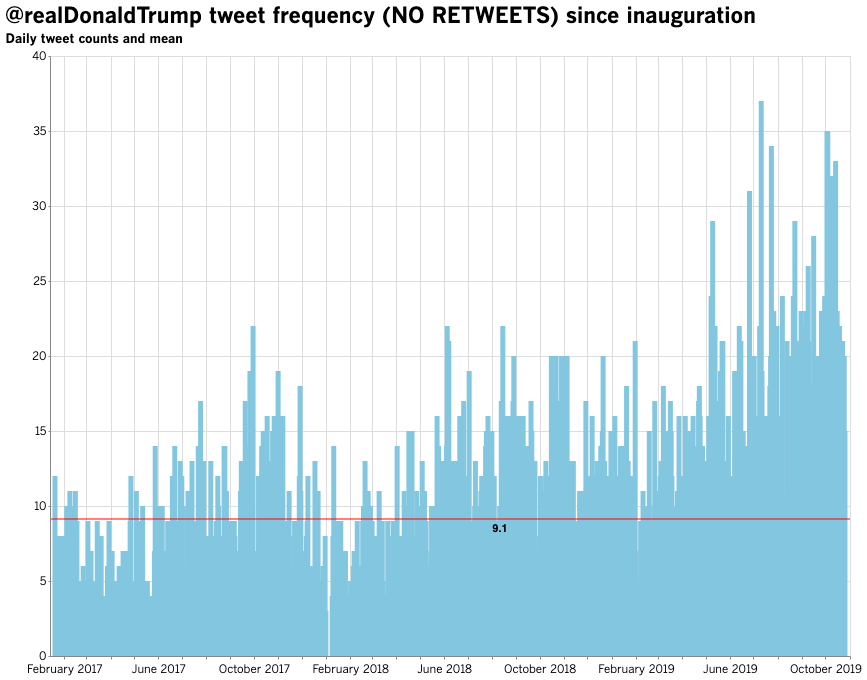

In [125]:
#bars
bars = alt.Chart(trump_no_rt_freq_inauguration, \
                 title = '@realDonaldTrump tweet frequency (NO RETWEETS) since inauguration').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%B 20%y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 40)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean
rule = alt.Chart(trump_no_rt_freq_inauguration).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=50,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( bars + rule + text ).properties(height=600,width=800)